Vamos ahora a probar la técnica de Random Forest, desde luego, esperamos mejores resultados ahora, el enfoque es el mismo, maximizar el Recall sin afectar demasiado a nuestro Accuaracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
import os
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Traemos nuestro pipeline de preproceaamiento, esta vez vamos a comentar nuestros esacalamientos, pues sabemos que para este tipo de modelos, muchas veces es contraproducente escalar nuestros datos, en un primer intento dejaremos las transformaciones hechas, y si vemos que no conseguimos buenos resultados podemos pensar en descartar algunas.

In [2]:
os.chdir('/content/drive/MyDrive/data_fraud')

In [3]:
# llamamos a nuestros datos de entrenamiento
train_data = pd.read_csv('train.csv')

# Definimos la función para eliminar columnas
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Columnas con alta cardinalidad
        high_cardinality_cols = ['P_emaildomain', 'R_emaildomain', 'id_30', 'id_31', 'id_33', 'DeviceInfo']

        # Columnas con muchos valores nulos (umbral 50%)
        null_cols = ['dist1', 'dist2', 'D2', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13', 'D14', 'M1', 'M2', 'M3', 'M5', 'M7',
                    'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V138', 'V139', 'V140', 'V141',
                    'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155',
                    'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169',
                    'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183',
                    'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
                    'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211',
                    'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225',
                    'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239',
                    'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
                    'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267',
                    'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V322', 'V323', 'V324',
                    'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
                    'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
                    'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25',
                    'id_26', 'id_27', 'id_28', 'id_29', 'id_32', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType']

        # Columnas constantes
        constant_cols = ['V305']

        # Columnas altamente correlacionadas
        corr_cols = {'V62', 'V84', 'C2', 'C11', 'V302', 'C14', 'V45', 'V301', 'V65', 'V280', 'V279', 'V299', 'V308', 'V76', 'C12',
                    'V309', 'V42', 'C6', 'C9', 'V64', 'V73', 'V33', 'V134', 'V137', 'V93', 'V94', 'V28', 'V90', 'V38', 'V125', 'V136',
                    'V119', 'V307', 'V30', 'V79', 'V60', 'V24', 'V113', 'V128', 'V48', 'V34', 'V22', 'V70', 'V91', 'V133', 'V291',
                    'V40', 'V97', 'V285', 'V292', 'C4', 'V36', 'V49', 'V105', 'V87', 'V294', 'V32', 'V284', 'V109', 'V306', 'V289',
                    'V297', 'V106', 'V124', 'V88', 'V102', 'V89', 'V31', 'V316', 'V16', 'V63', 'V13', 'V295', 'V101', 'V83', 'V311',
                    'C10', 'V131', 'V72', 'V43', 'V96', 'C13', 'V20', 'V69', 'V112', 'V21', 'V100', 'V318', 'V54', 'V111', 'V123',
                    'V317', 'V303', 'V57', 'V298', 'V18', 'V287', 'V315', 'C7', 'V59', 'V15', 'V52', 'V58', 'V118', 'V320', 'V110',
                    'V78', 'V85', 'V321', 'V312', 'V92', 'V50', 'TransactionDT', 'V127', 'V122', 'V304', 'V81', 'V71', 'V80', 'V74',
                    'V26', 'V116', 'V293', 'V103', 'V310', 'C8', 'V132', 'V51', 'V114', 'V296', 'V68', 'V126'}

        # Columnas no predictivas
        non_predictive_cols = ['TransactionID']

        # Combinamos todas las columnas a eliminar
        all_cols_to_drop = high_cardinality_cols + null_cols + constant_cols + list(corr_cols) + non_predictive_cols

        # Eliminamos las columnas
        X = X.drop(columns=all_cols_to_drop)

        return X

# Funciones de transformación
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    x_reflected = x.max() - x  # Reflejamos valores
    return np.log1p(x_reflected)

def sqrt_transform(x):
    return np.sqrt(abs(x))

# Columnas categóricas y numéricas
categorical_features = ['ProductCD', 'card4', 'card6', 'M4', 'M6']
numeric_mean_log_cols = ['V61', 'V82']
numeric_median_log_cols = ['TransactionAmt', 'C1', 'C3', 'C5', 'D1', 'D3', 'V17', 'V23', 'V25', 'V27', 'V37',
                         'V39', 'V44', 'V46', 'V47', 'V55', 'V56', 'V66', 'V67', 'V77', 'V86', 'V95', 'V98',
                         'V99', 'V104', 'V108', 'V115', 'V117', 'V120', 'V121', 'V129', 'V130', 'V135', 'V281',
                         'V282', 'V283', 'V286', 'V288', 'V290', 'V300', 'V313', 'V314', 'V319']
numeric_median_sqrt_cols = ['card3', 'card5', 'D4', 'D10', 'D15', 'V29']
numeric_median_inv_cols =  ['addr2', 'V14', 'V41', 'V107']
numeric_mean_cols = ['card1', 'card2', 'addr1', 'V12', 'V35', 'V53', 'V75']
numeric_median_cols = ['V19']

# Creamos los transformadores
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_mean_log_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log', FunctionTransformer(log_transform)),
    #('scaler', StandardScaler())
])

numeric_median_log_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(log_transform)),
    #('scaler', StandardScaler())
])

numeric_median_sqrt_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('sqrt', FunctionTransformer(sqrt_transform)),
    #('scaler', StandardScaler())
])

numeric_median_inv_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('inv', FunctionTransformer(inverse_log_transform)),
    #('scaler', StandardScaler())
])

numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler())
])

numeric_median_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    #('scaler', StandardScaler())
])

# Unimos los transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num_mean_log', numeric_mean_log_transformer, numeric_mean_log_cols),
        ('num_median_log', numeric_median_log_transformer, numeric_median_log_cols),
        ('num_median_sqrt', numeric_median_sqrt_transformer, numeric_median_sqrt_cols),
        ('num_median_inv', numeric_median_inv_transformer, numeric_median_inv_cols),
        ('num_mean', numeric_mean_transformer, numeric_mean_cols),
        ('num_median', numeric_median_transformer, numeric_median_cols),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creamos el pipeline completo
pipeline = Pipeline(steps=[('drop_columns', DropColumns()),
                           ('preprocessor', preprocessor)])

# Separamos el target y las características
X_train = train_data.drop(columns=['isFraud'])
y_train = train_data['isFraud']

# Ajustamos el pipeline y transformar los datos
X_train_prepared = pipeline.fit_transform(X_train)

# Ahora X_train_prepared esta listo para ser usado

In [4]:
modelo_random_f_1 = RandomForestClassifier(random_state=42)

In [5]:
modelo_random_f_1.fit(X_train_prepared, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_train_predict_1 = modelo_random_f_1.predict(X_train_prepared)

In [7]:
# evaluamos las predicciones
acc_train_1 = accuracy_score(y_train, y_train_predict_1)
print(f"Accuracy en el conjunto de entrenamiento: {acc_train_1}")

recall_train_1 = recall_score(y_train, y_train_predict_1)
print(f"Recall en el conjunto de entrenamiento: {recall_train_1}")

Accuracy en el conjunto de entrenamiento: 0.9992069306706345
Recall en el conjunto de entrenamiento: 0.9921761574447492


Aunque es bueno que muestre un buen rendimeinto con nuestro primer intento, generalmente tener metricas tan buenas debe hacernos dudar, vamos rápidamente a ver como funciona nuestro modelo en el conjunto de validación.

In [8]:
val_data = pd.read_csv('val.csv')

x_val = val_data.drop(columns=['isFraud'])
y_val = val_data['isFraud']

x_val_prepared = pipeline.transform(x_val)

In [9]:
y_val_predict_1 = modelo_random_f_1.predict(x_val_prepared)

# Vemos el rendimiento
acc_val_1 = accuracy_score(y_val, y_val_predict_1)
print(f"Accuracy en el conjunto de validación: {acc_val_1}")

recall_val_1 = recall_score(y_val, y_val_predict_1)
print(f"Recall en el conjunto de validación: {recall_val_1}")


Accuracy en el conjunto de validación: 0.947273015657218
Recall en el conjunto de validación: 0.5325429470118558


Esto nos indica overfitting, pues los resultados en el conjunto de entrenamiento son considerablemente mayores que en nuestro conjunto de validación, pero de nuevo, el modelo no esta prendiendo de la clase minoritaria, tenemos que generar datos sintéticos para tener un dataset con clases balanceadas, y así ver si podemos mejorar éstas predicciones.

Ademas tenemos que definir algunos hiperprámetros que consideremos que pueden mejorar el rendimiento del modelo y usaremos la validación cruzada para encontrar los mejores hiperparámetros.

In [15]:
# Importamos más bibliotecas necesarias
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Creamos una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicamos SMOTE para generar datos sintéticos de la clase minoritaria
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prepared, y_train)

# Definimos el modelo
modelo_random_f_2 = RandomForestClassifier(random_state=42)

# Definimos el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [200, 300, 500, 700], # Rango amplio para dataset grande
    'max_depth': [10, 20, 30, 40, None],  # Profundidades limitadas para evitar overfitting
    'min_samples_split': [2, 5, 10, 20], # Control de la complejidad
    'min_samples_leaf': [1, 2, 4, 8], # Control de la complejidad
    'max_features': ['sqrt', 'log2', 0.5, 0.7], # Rango reducido para evitar overfitting
    'class_weight': ['balanced', {0: 1, 1: 5}, {0: 1, 1: 10}] # Peso a la clase minoritaria, rango reducido
}
# Comentamos nuestro primer rango de hiperparámetros, porque obtuvimos un Recall de 0.57 en nuestro mejor modelo en el conjunto de validación
# así que los nuevos rangos de búsqueda se encuentran arriba
#param_dist = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

# Definimos la estrategia de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creamos una instancia de RandomizedSearchCV con validación cruzada
random_search = RandomizedSearchCV(
    modelo_random_f_2,
    param_distributions=param_dist,
    n_iter=10,
    scoring='recall',
    cv=cv,  # Usamos la estrategia de validación cruzada definida
    random_state=42,
    n_jobs=-1
)

# Entrenamos el modelo con RandomizedSearchCV usando los datos sobremuestreados
random_search.fit(X_train_resampled, y_train_resampled)

# Obtenemos el mejor modelo y sus hiperparámetros
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Imprimimos los mejores hiperparámetros
print("Mejores hiperparámetros:", best_params)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'class_weight': {0: 1, 1: 10}}


In [16]:
# vamos a evaluarlo en el conjunto de validación
y_val_predict_2 = best_model.predict(x_val_prepared)

acc_val_2 = accuracy_score(y_val, y_val_predict_2)
print(f"Accuracy en el conjunto de validación: {acc_val_2}")

recall_val_2 = recall_score(y_val, y_val_predict_2)
print(f"Recall en el conjunto de validación: {recall_val_2}")

Accuracy en el conjunto de validación: 0.8720458613735753
Recall en el conjunto de validación: 0.7749818533752721


El modelo mejoro, sobre todo en el recall, podemos ajustar el umbral de decisión para ver que tanto aefctaría su uso en el rendimiento del accuracy.

In [21]:
# probemos con un umbral de 0.4

y_val_probs = best_model.predict_proba(x_val_prepared)[:, 1]  # Probabilidades de la clase 1
umbral = 0.4 # Ajustamos este valor según los resultados

y_val_pred_2_adjusted = (y_val_probs >= umbral).astype(int)

# Recalculamos las métricas con el nuevo umbral
valid_acc = accuracy_score(y_val, y_val_pred_2_adjusted)
valid_recall = recall_score(y_val, y_val_pred_2_adjusted)

print(f"Accuracy en validación: {valid_acc}")
print(f"Recall en validación: {valid_recall}")

# Matriz de confusión
print(confusion_matrix(y_val, y_val_pred_2_adjusted))


Accuracy en validación: 0.8114336210998573
Recall en validación: 0.8516815872247762
[[32291  7709]
 [  613  3520]]


En el caso de la regresión logistica, al hacer este procedimiento obteniamos un Recall similar, pero un Accuaracy sumamente más bajo, ésto es bastante bueno para nosostros, porque mejoreremos nuestra prediccion de fraudes, sin sacrificar tanto las operaciones legítimas, vamos a hacer un pipeline final con nuestros datos, similar a lo que hcicimos en la regresión logistica.

In [22]:
from sklearn.base import ClassifierMixin

class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier, threshold=0.5):
        self.base_classifier = base_classifier
        self.threshold = threshold

    def fit(self, X, y):
        self.base_classifier.fit(X, y)
        return self

    def predict(self, X):
        probs = self.base_classifier.predict_proba(X)[:, 1]
        return (probs >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.base_classifier.predict_proba(X)

In [23]:
# Creamos una instancia del clasificador con umbral personalizado, en este caso 0.4
threshold_classifier = ThresholdClassifier(best_model, threshold=0.4)

# Creamos el pipeline final con el clasificador de umbral
pipeline_final_rf = Pipeline([
    ('preprocesamiento', pipeline),
    ('modelo', threshold_classifier)
])

In [24]:
# Hacemos una gráfica de como se ve nuestro pipeline
from sklearn import set_config
set_config(display='diagram')
pipeline_final_rf

Pipeline(steps=[('preprocesamiento',
                 Pipeline(steps=[('drop_columns', DropColumns()),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num_mean_log',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('log',
                                                                                    FunctionTransformer(func=<function log_transform at 0x7a7837371300>))]),
                                                                   ['V61',
                                                                    'V82']),
                                                                  ('num_median_log',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy=...
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['ProductCD',
                                                                    'card4',
                                                                    'card6',
                                                                    'M4',
                                                                    'M6'])]))])),
                ('modelo',
                 ThresholdClassifier(base_classifier=RandomForestClassifier(class_weight={0: 1,
                                                                                          1: 10},
                                                                            max_depth=30,
                                                                            max_features='log2',
                                                                            min_samples_leaf=4,
                                                                            min_samples_split=5,
                                                                            n_estimators=500,
                                                                            random_state=42),
                                     threshold=0.4))])

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


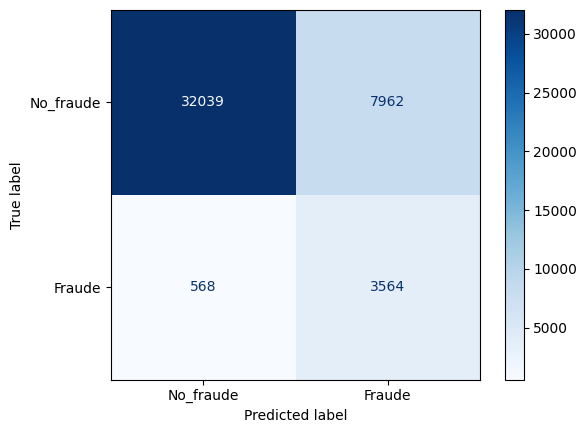

Accuracy en el conjunto de prueba: 0.8067205945664242
Recall en el conjunto de prueba: 0.8625363020329139


In [25]:
# traemos nuestros datos de prueba y vemos el rendimiento

data_test = pd.read_csv('test.csv')

x_test = data_test.drop(columns=['isFraud'])
y_test = data_test['isFraud']

y_test_pred = pipeline_final_rf.predict(x_test)

# evaluamos los resultados
# Obtenemos nuestras metricas
test_acc = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# tambien obtenemos nuestra matriz de confussion, pero de una forma más llamtiva
matriz_confusion_test = confusion_matrix(y_test, y_test_pred)

# Visualización de la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_test,
                                    display_labels=['No_fraude', 'Fraude']) # Reemplaza con tus etiquetas
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


print(f"Accuracy en el conjunto de prueba: {test_acc}")
print(f"Recall en el conjunto de prueba: {test_recall}")


Los resultados son bstante buenos en comparación con el mejor modelo entrenado con la regresión logistica, principalmente porque tenemos un mejor equilibrio entre Recall y Accuracy. Estamos detectando más del 85% de las transacciones fraudulentas, en consecuencia el 20% de las transacciones legítimas son clasificadas erronéamente como fraude.

Estos resultados no son tan convincentes, pues causar molestias en 1/5 parte de las transacciones autenticas es algo con lo que una empresa no quiere lidiar, pues es una molestía patra los clientes, seguiremos en búsqueda de un mejor modelo, que mejore tanto el Recall como el Accuracy.

Salvamos el modelo para futuras comparaciones.

In [26]:
os.chdir('/content/drive/MyDrive/models_fraud')

In [27]:
from joblib import dump

dump(pipeline_final_rf, "pipeline_random_forest.joblib")

['pipeline_random_forest.joblib']

In [28]:
# si quisieramos cargarlo

#from joblib import load

#model_random_forest = load("pipeline_random_forest.joblib")